In [177]:
from SIRModel import *
import matplotlib.pyplot as plt
import pandas as pd
# calculate percentage differences, and compare

us_records = pd.read_csv("./data/US_counties_COVID19_health_weather_data.csv")



In [178]:
counties = us_records.county.unique()
county_specific = {elem: pd.DataFrame for elem in counties}
for county in county_specific.keys():
    county_specific[county] = us_records[:][us_records.county == county].reset_index()

In [212]:
county_name = "Los Angeles"
county = county_specific[county_name]

In [213]:
pct_change = county["cases"].pct_change()
pct_change_deaths = county["deaths"].pct_change()
stay_at_home_order_index = len(county[county.stay_at_home_effective == "no"].index)
pct_change_deaths.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: deaths, dtype: float64

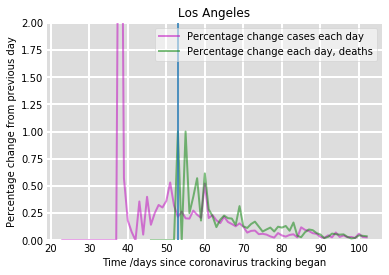

In [214]:
range_start = stay_at_home_order_index - 30
range_end = stay_at_home_order_index+50
stay_at_home_difference = pct_change[range_start:range_end]
stay_at_home_difference_deaths = pct_change_deaths[range_start:range_end]
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True, title=county_name)
ax.plot(range(range_start,range_end), stay_at_home_difference, 'm', alpha=0.5, lw=2, label="Percentage change cases each day")
ax.plot(range(range_start,range_end), stay_at_home_difference_deaths, 'g', alpha=0.5, lw=2, label="Percentage change each day, deaths")
ax.axvline(stay_at_home_order_index)
ax.set_xlabel('Time /days since coronavirus tracking began')
ax.set_ylabel('Percentage change from previous day')
ax.set_ylim(0, 2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()